<a href="https://colab.research.google.com/github/jx-dohwan/Aiffel_Kaggle_manuscript/blob/main/kaggle_manuscript_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Top 4% with ensemble modeling

- 해당 링크의 캐글 코드를 필사 (https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic/notebook)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
path = "/content/drive/MyDrive/인공지능/아이펠/풀잎_캐글필사/data"

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight') # matplotlib 스타일시트를 바꿔줄 수 있다.
import warnings 
warnings.filterwarnings('ignore') # 경고메시지 ignore한다.
%matplotlib inline

In [5]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

## 2. 데이터 로드 및 확인

In [6]:
data = pd.read_csv(path+"/titanic_train.csv")

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Sex -> Categorical Feature

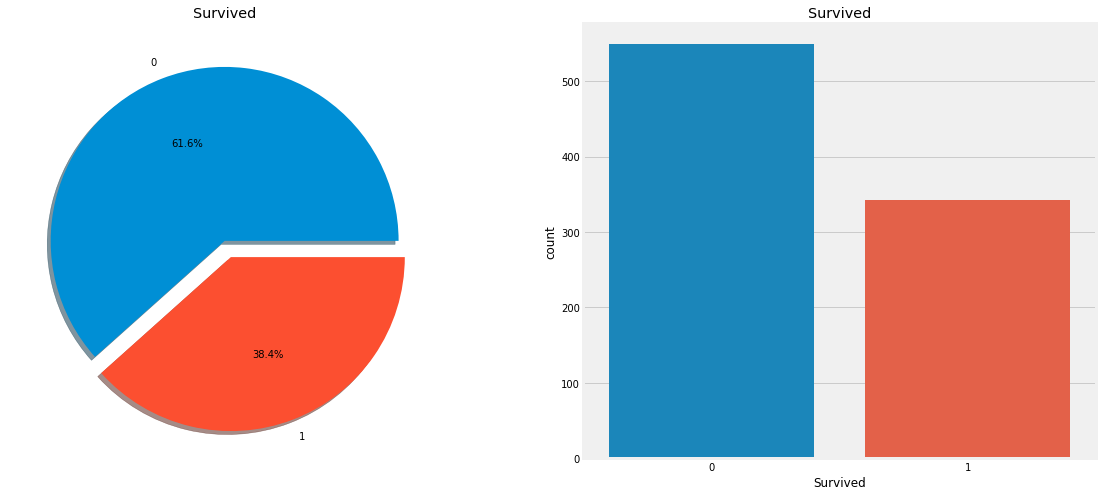

In [10]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True) 
# explode : 부채꼴이파이 차트의 중심에서 벗어나는 정도
# autopct : 부채꼴 안에 표시될 숫자의 형식 지정
# ax : 위치 지정
# shadow : True 그림자가 표시됨
ax[0].set_title('Survived') # 여러개의 그래프를 보여줄때는 set_을 사용함
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1]) # 막대를 사용하여 각 범주형 빈의 관측값 개수를 표시
ax[1].set_title('Survived')
plt.show()

In [11]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [12]:
data.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

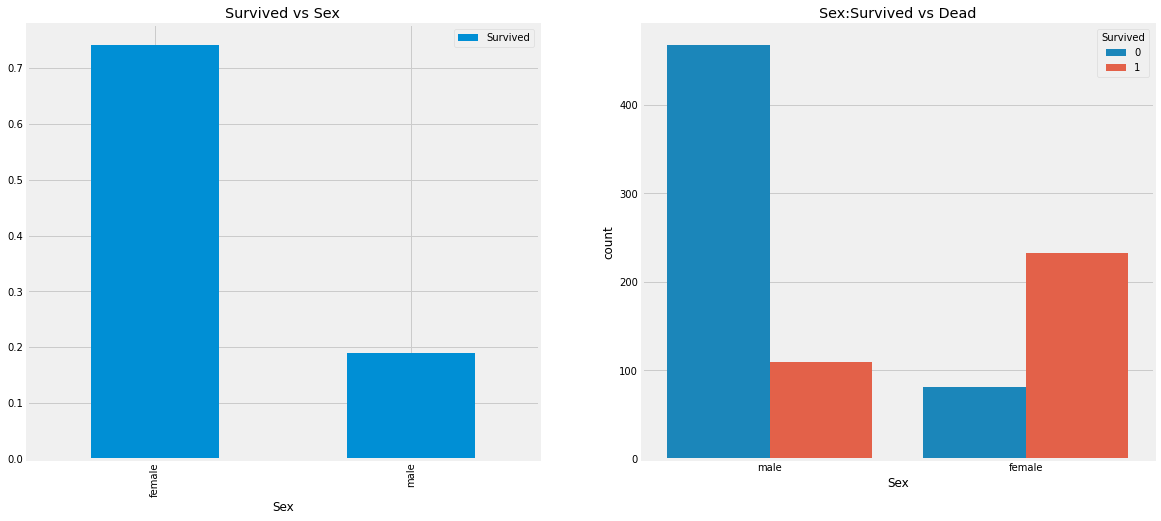

In [13]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby('Sex').mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

### Pclass -> Ordinal Feature

In [14]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


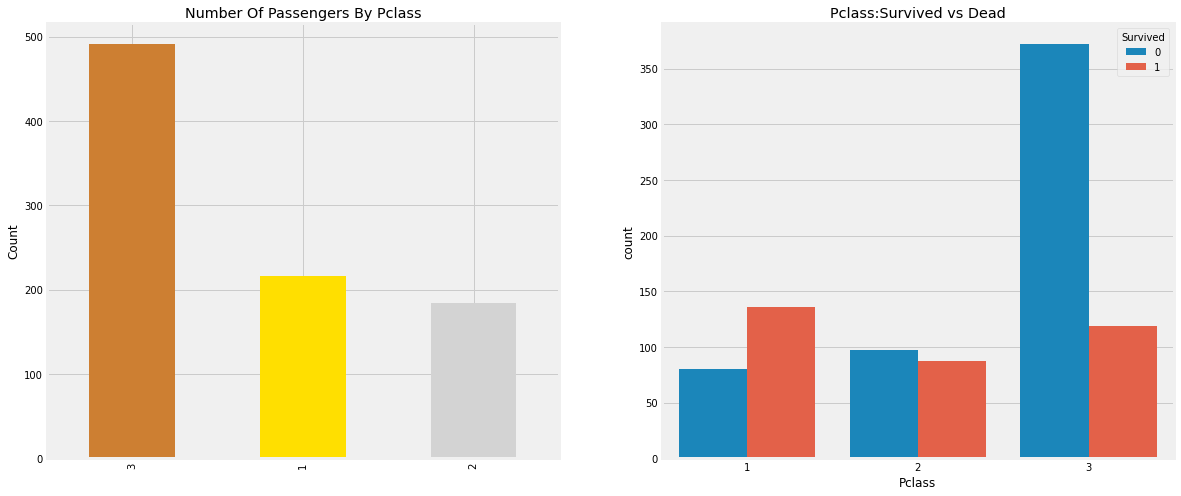

In [15]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass',hue='Survived', data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [16]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')
 # 빈도표
 # margin은 여백 기본값은 False이기 때문에 True는 굳이 안해줘도 된 것 같은데

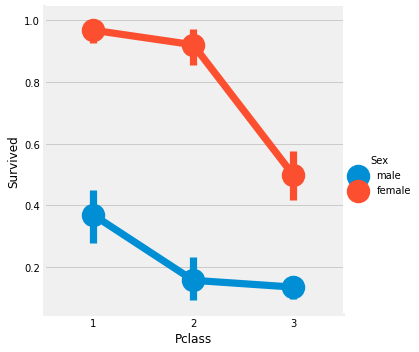

In [17]:
sns.factorplot('Pclass','Survived',hue='Sex', data=data) #  FacetGrid에 범주형 플롯을 그리는 데 사용
plt.show()

### Age -> Continous Feature

In [18]:
print('Oldest Passenger was of : ', data['Age'].max(),'살')
print('Youngest Passenger was of : ',data['Age'].min(),'살')
print('Average Age on the ship : ',data['Age'].mean(),'살')

Oldest Passenger was of :  80.0 살
Youngest Passenger was of :  0.42 살
Average Age on the ship :  29.69911764705882 살


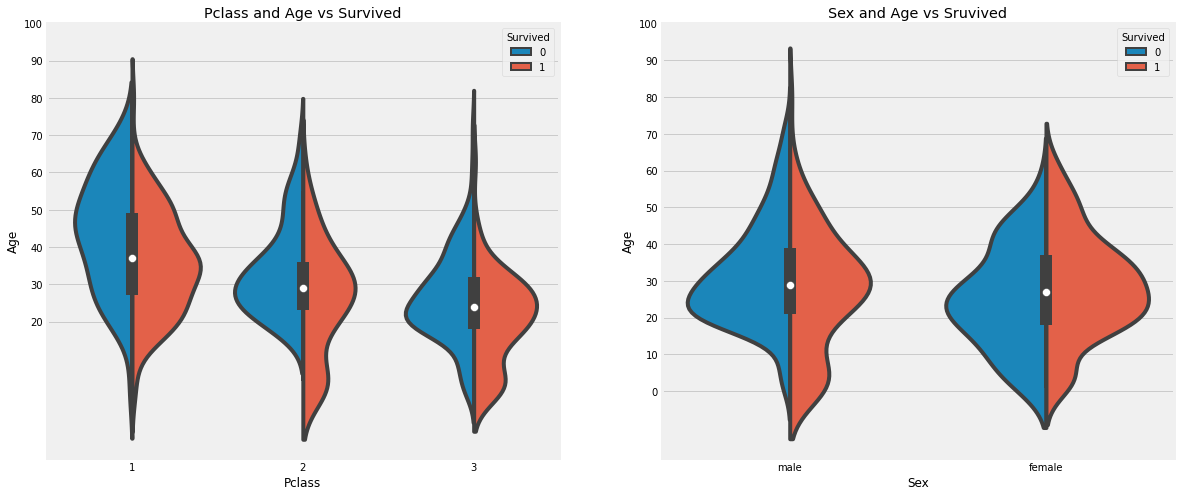

In [19]:
f, ax = plt.subplots(1,2, figsize=(18,8))
sns.violinplot('Pclass','Age', hue='Survived', data=data, split=True, ax=ax[0]) 
# 본 분포의 커널 밀도 추정을 특징
#  splitTrue로 설정하면 각 레벨에 대해 바이올린의 절반이 그려집니다
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(20,110,10)) # 위치 목록이다. 

sns.violinplot('Sex','Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Sruvived')
ax[1].set_yticks(range(0,110,10))
plt.show()


In [20]:
data['Initial'] = 0
for i in data:
  data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.') 
  # str.extract 는 정규표현식사용
  # 대문자 소문자 a~z까지 반복하값 모두 가져온다.

In [21]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [22]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [23]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [24]:
# Age 결측치 부분에 각 '성' 별로 평균 나이 넣어주기
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [25]:
data.Age.isnull().any() # 여부 확인

False

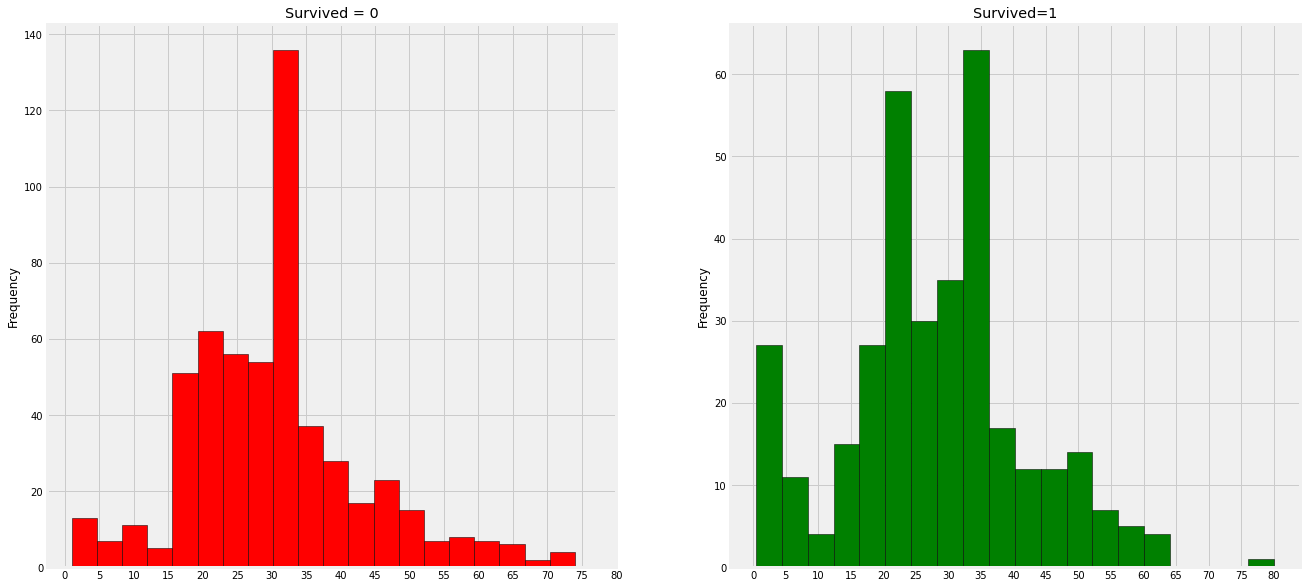

In [26]:
f, ax = plt.subplots(1,2,figsize=(20,10))

# 죽은 사람의 나이를 기준으로 히스토그램 도출 bins는 빈도수
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black', color='red')
ax[0].set_title('Survived = 0')
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)

data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived=1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)

plt.show()


### pclass 별 생존

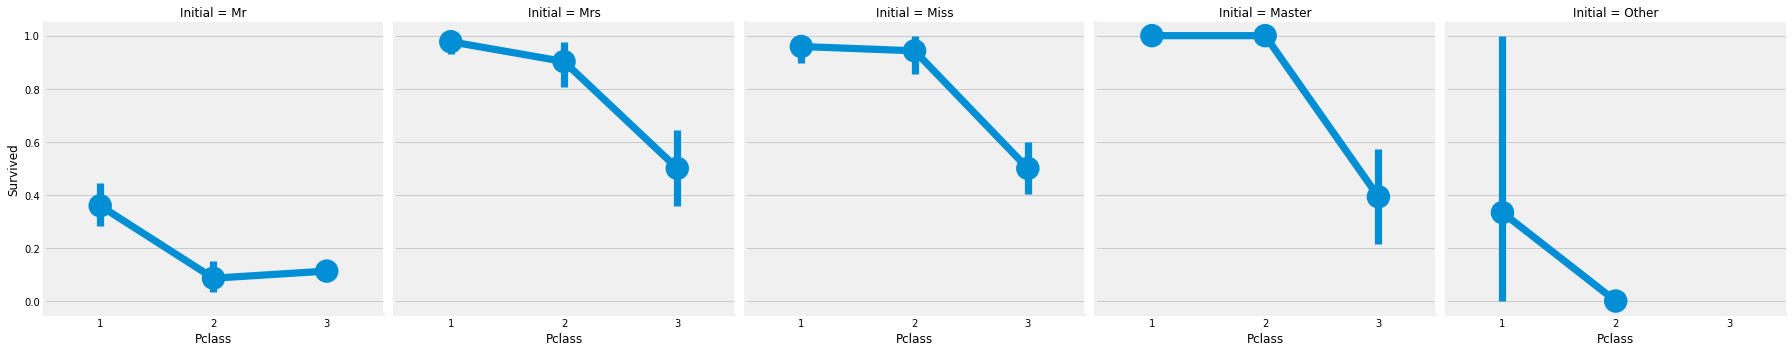

In [27]:
sns.factorplot('Pclass','Survived',col='Initial',data=data) #  범주형 플롯을 그리는 데 사용
plt.show()

In [28]:
# 어디서 탔는지를 중심으로 Pclass를 그룹화 그리고 성별을 기준으로 생존을 그룹화한 내역을 보여줌
pd.crosstab([data.Embarked, data.Pclass], [data.Sex,data.Survived], margins=True).style.background_gradient(cmap='summer_r')

### 승선항구별 survived

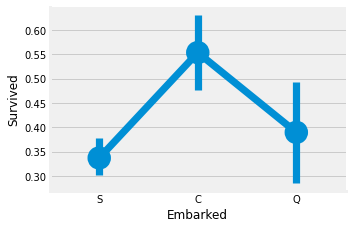

In [29]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()# 현재 수치를 가져옵니다. 현재 pyplot 그림 스택에 그림이 없으면 를 사용하여 새 그림을 figure()만듭니다
fig.set_size_inches(5,3)
plt.show()

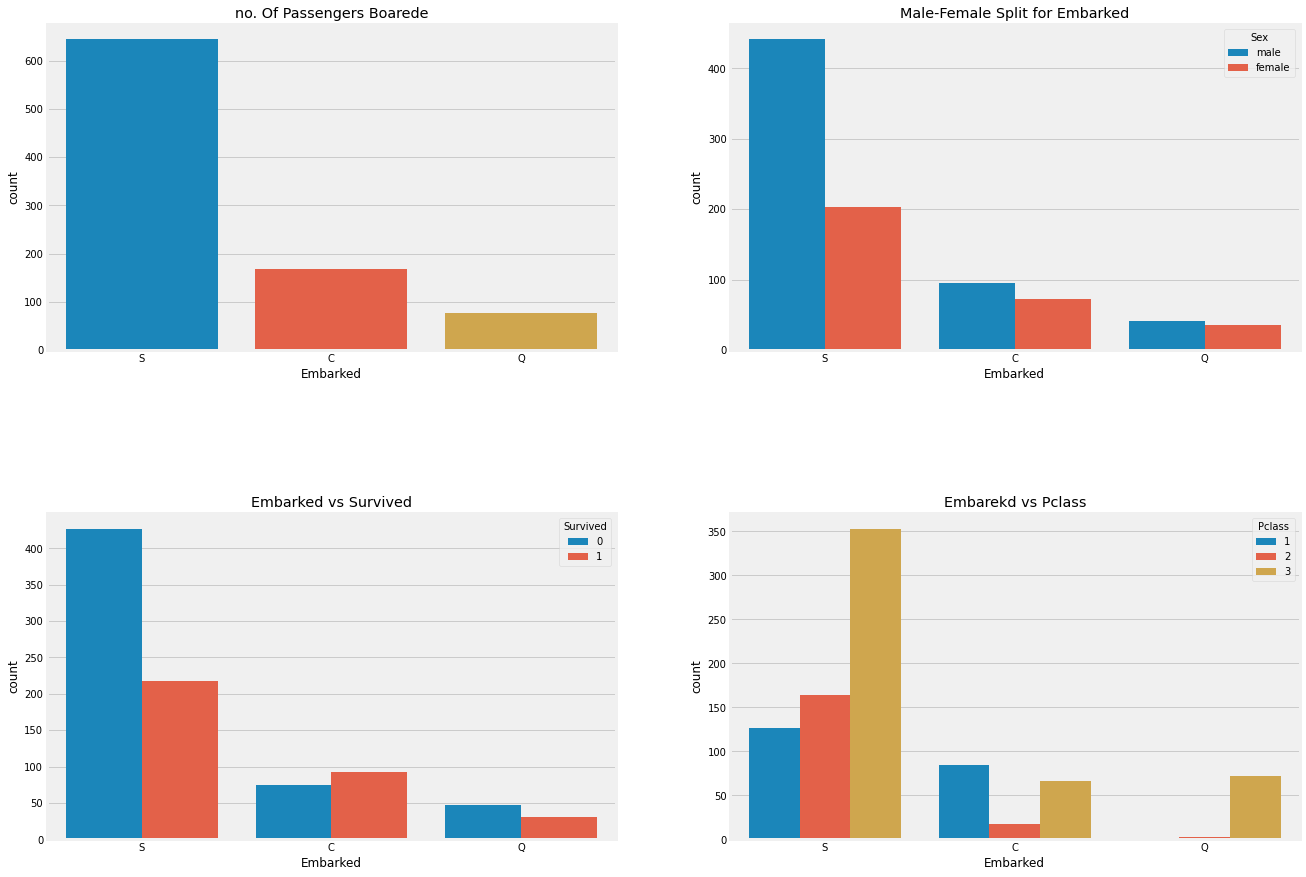

In [30]:
f, ax = plt.subplots(2,2,figsize=(20,15))
# 각 기준별 막대그래프
sns.countplot('Embarked',data=data, ax=ax[0,0])
ax[0,0].set_title('no. Of Passengers Boarede')

sns.countplot('Embarked',hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarekd vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
#서브플롯 레이아웃 매개변수를 조정
# 패딩 넓이와 패딩 높이를 조정
plt.show()

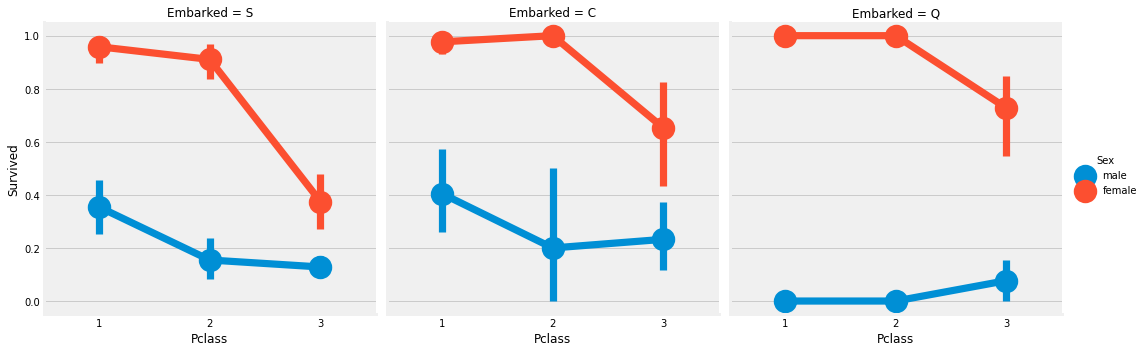

In [31]:
sns.factorplot('Pclass','Survived',hue='Sex', col='Embarked', data=data)
plt.show()

In [32]:
data['Embarked'].fillna('S',inplace=True) # 결측값 채우기 S로 inplcce=True는 데이터자체에 적용

In [33]:
data.Embarked.isnull().any()

False

### 형제자매와 생존

In [34]:
# 형제자매명수 별 생존
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')


Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


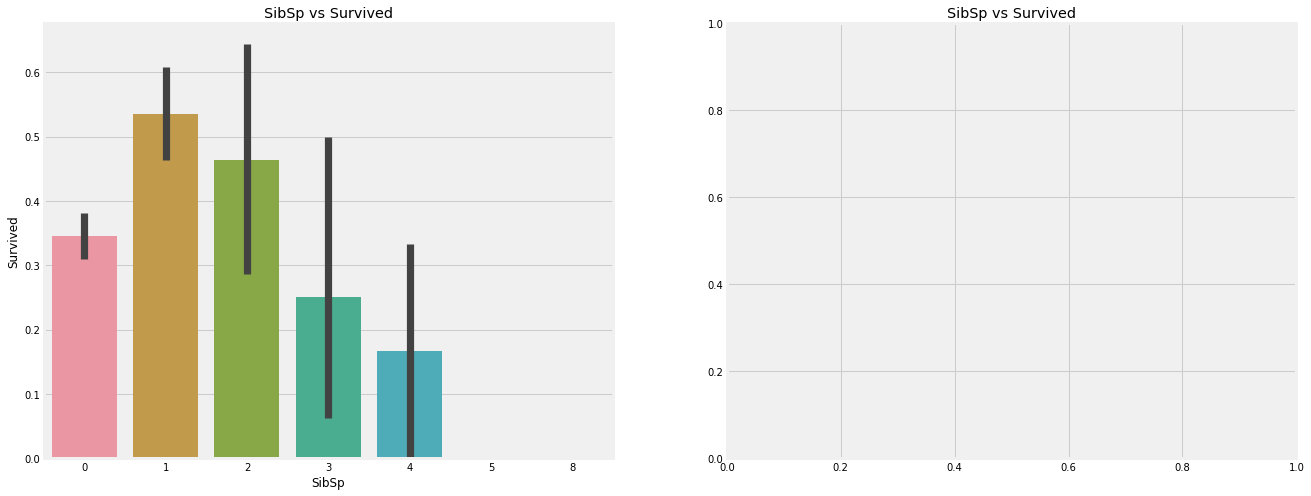

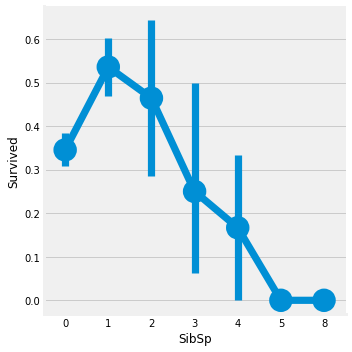

In [35]:
f, ax = plt.subplots(1,2, figsize=(20, 8))

sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.factorplot('SibSp','Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')

#plt.close(0) # 이 코드 안먹는거 같음 일단 넘어가자
plt.show()

In [36]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


- 부모 혹은 자식과 생존

In [37]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')


Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


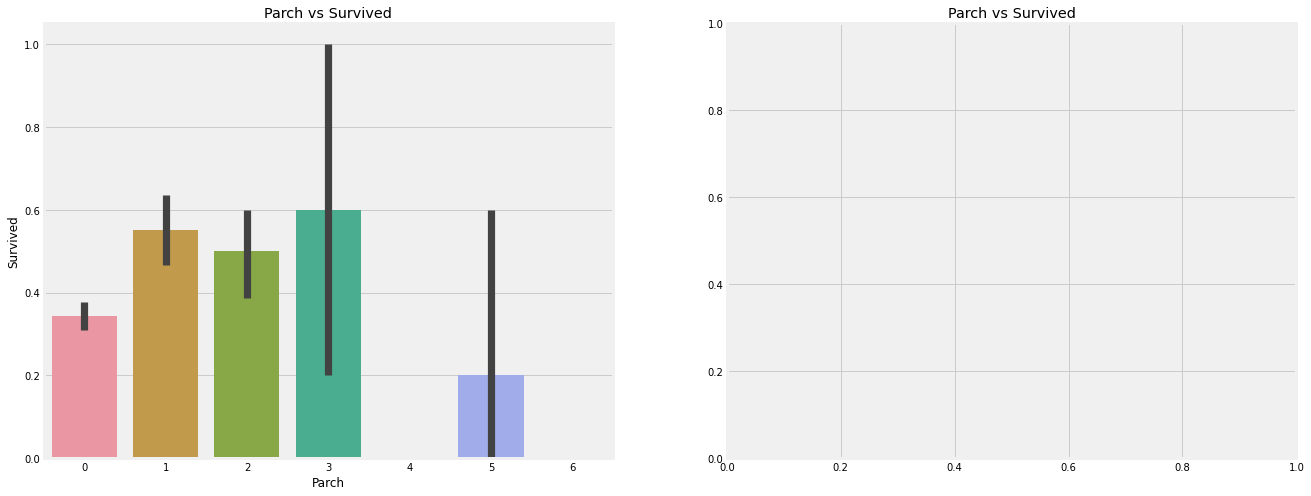

<Figure size 360x360 with 0 Axes>

In [38]:
f, ax = plt.subplots(1,2,figsize=(20,8))

sns.barplot('Parch','Survived', data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.factorplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')

plt.clf()
# matplotlib.pyplot.cla()메서드는 현재 좌표축을 지우고
# matplotlib.pyplot.clf()메서드는 현재 Figure를 지우며
# matplotlib.pyplot.close()메서드는 전체 창을 닫습니다.
plt.show()

### 요금과 생존

In [39]:
print('Highest Fare was : ', data['Fare'].max())
print('Lowest Fare was : ', data['Fare'].min())
print('Average Fare was : ', data['Fare'].mean())

Highest Fare was :  512.3292
Lowest Fare was :  0.0
Average Fare was :  32.204207968574636


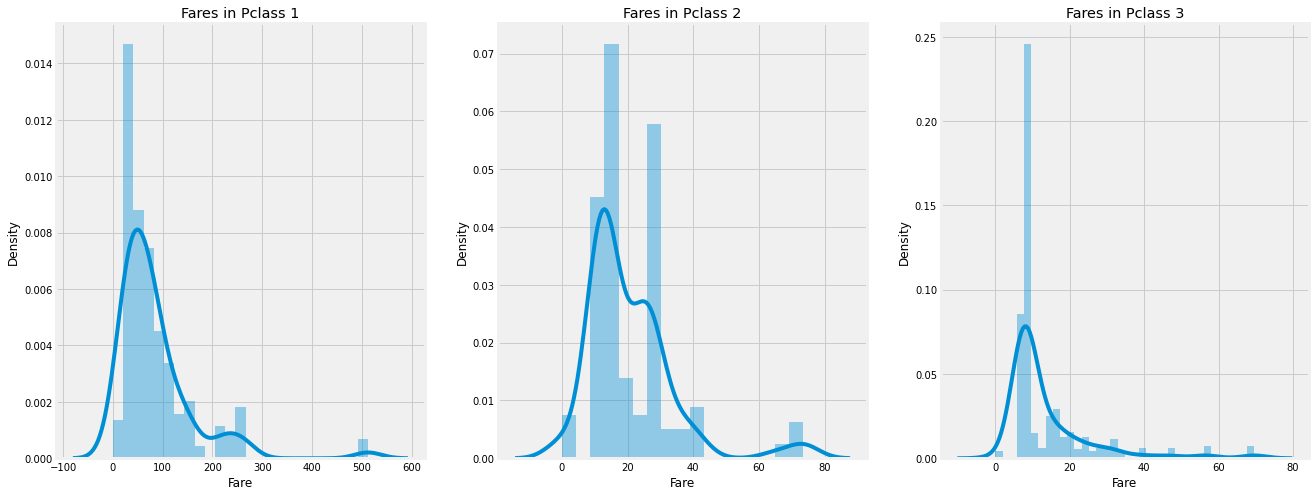

In [40]:
f, ax = plt.subplots(1,3,figsize=(20,8))

sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

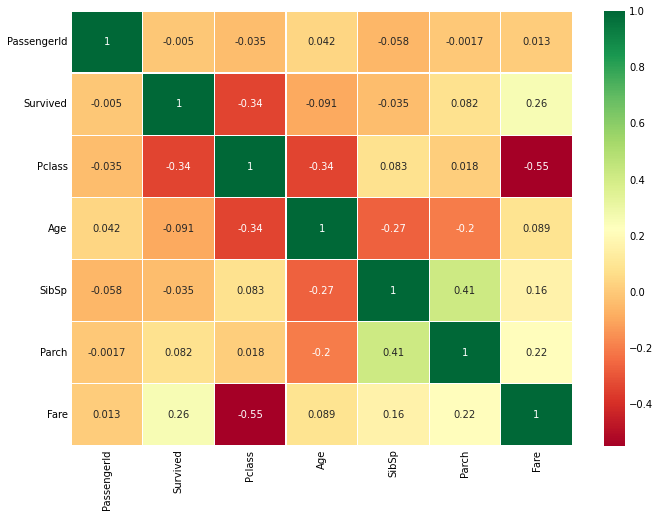

In [41]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn',linewidths=0.2)#상관분석 히트맵
fig = plt.gcf() 
# 현재 수치를 가져옵니다. 현재 pyplot 그림 스택에 그림이 없으면 를 사용하여 새 그림을 figure()만듭니다
fig.set_size_inches(10,8)
plt.show()

## 데이터 전처리?

### 나이를 묶음

In [42]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [43]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


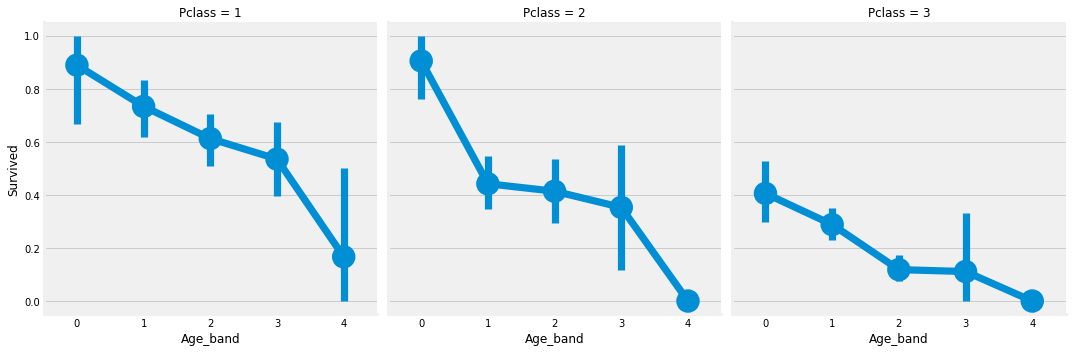

In [44]:
sns.factorplot('Age_band','Survived', data=data, col='Pclass')
plt.show()

### 형제자매 + 부모자식 = 가족

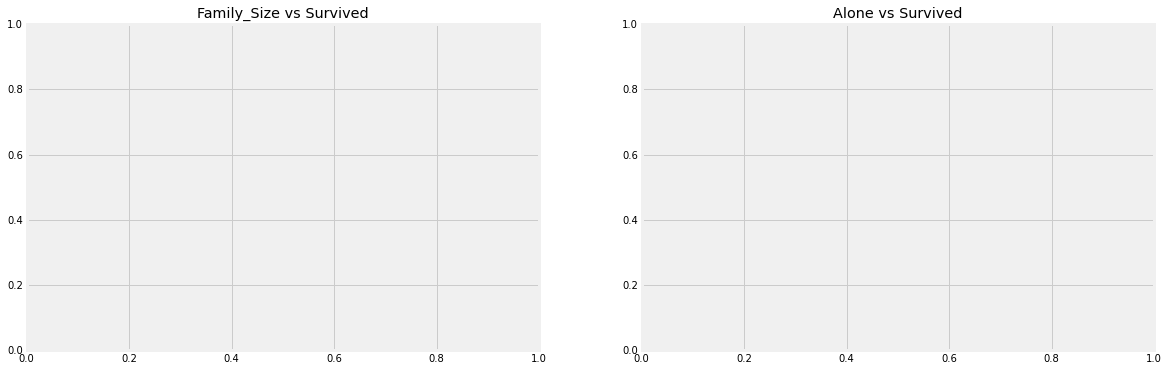

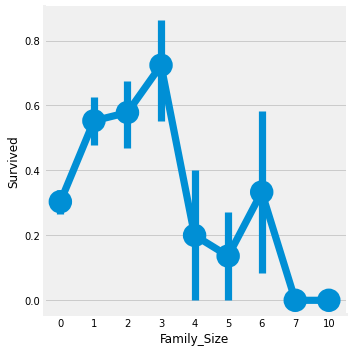

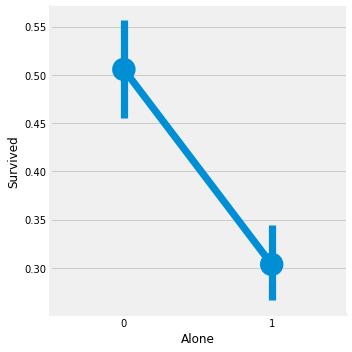

In [45]:
data['Family_size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']
data['Alone'] = 0
data.loc[data.Family_Size==0,'Alone']=1

f, ax= plt.subplots(1,2,figsize=(18,6))

sns.factorplot('Family_Size','Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')

sns.factorplot('Alone', 'Survived', data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')


plt.show()

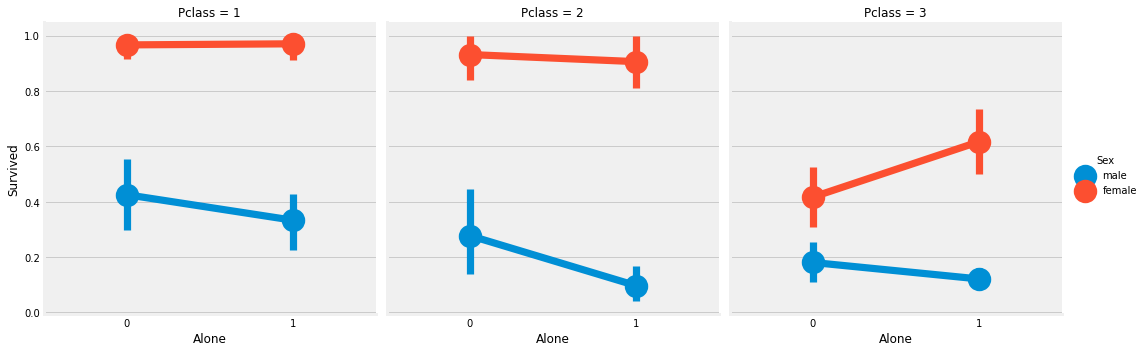

In [46]:
sns.factorplot('Alone','Survived', data=data,hue='Sex', col='Pclass')
plt.show()

In [47]:
data['Fare_Range'] = pd.qcut(data['Fare'],4)
# qcut 함수는 cut 함수와 다르게 동일한 길이로 구간을 나누는 개념이 아닌 동일한 갯수로 구간을 나누는 함수이다.
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [48]:
data['Fare_cat'] = 0
data.loc[data['Fare'] <= 7.91,'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454),'Fare_cat']=1
data.loc[(data['Fare'] > 14.454)&(data['Fare'] <=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare'] <= 513),'Fare_cat']=3

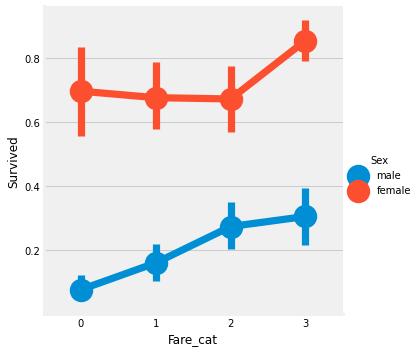

In [49]:
sns.factorplot('Fare_cat','Survived', data=data,hue='Sex')
plt.show()

In [50]:
# 범중형 데이터를 수치형 데이터로 replcce 해주고 있다.
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

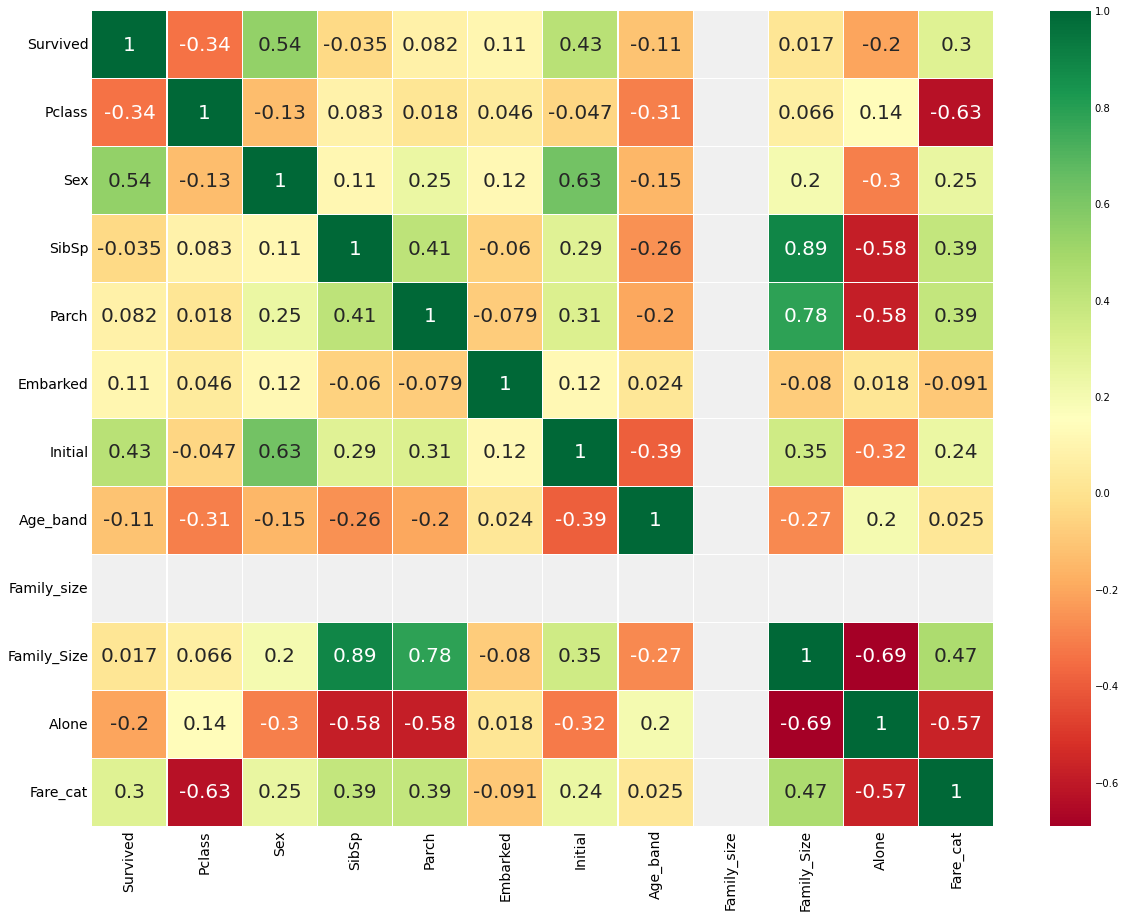

In [54]:
# 필요 없는 데이터 삭제하고 히트맵으로 상관분석을 해본다. 
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf() # 현재 수치를 가져옵니다. 현재 pyplot 그림 스택에 그림이 없으면 를 사용하여 새 그림을 figure()만듭니다
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## 모델링 작업을 할 것이다.

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

### 데이터 분리

In [56]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])

train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]

test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]

X=data[data.columns[1:]]
Y=data['Survived']

- C-서포트 벡터 분류. 구현은 libsvm을 기반으로 합니다. 적합 시간은 샘플 수에 따라 최소한 2차적으로 확장되며 수만 샘플을 초과하면 비실용적일 수 있습니다. 

In [57]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1) # 커널 유형 지정 기본값 부동소수점-정규화매개변수로 정규화의 강도는 c에 반비례함 양수여야함, gamma는 rbf poly sigmoid에 대한 커널 계수
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.835820895522388


In [58]:
model = svm.SVC(kernel='linear',C=0.1, gamma=0.1) # 커널 유형 지정 선형
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is ', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is  0.8171641791044776


- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [59]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [60]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8059701492537313


- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [61]:
model = KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5 = model.predict(test_X)
print('The accuracy of the KNN is ',metrics.accuracy_score(prediction5, test_Y))

The accuracy of the KNN is  0.8134328358208955


In [62]:
a_index = list(range(1,11)) #
a = pd.Series() # 축 레이블이 있는 1차원 ndarray
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(train_X, train_Y)
  prediction = model.predict(test_X)
  a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))
plt.plot(a_index,a)
plt.xticks(x)
fig=plt.gcf()) # 현재 수치를 가져옵니다. 현재 pyplot 그림 스택에 그림이 없으면 를 사용하여 새 그림을 figure()만듭니다
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are : ', a.values,'with the max value as ', a.values.max())

SyntaxError: ignored

- https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [63]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6, test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [64]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('The accuracy of the Random Forests is', metrics.accuracy_score(prediction7, test_Y))

The accuracy of the Random Forests is 0.8246268656716418


- K-Folds 교차 검증기 학습/테스트 세트의 데이터를 분할하기 위한 학습/테스트 인덱스를 제공합니다. 데이터 세트를 k 연속 접기로 분할합니다(기본적으로 섞지 않음). 그런 다음 각 폴드는 유효성 검사로 한 번 사용되는 반면 k - 1개의 나머지 폴드는 훈련 세트를 형성합니다.

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

In [65]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 

kfold = KFold(n_splits=10, shuffle=True) 
xyz=[]
accuracy=[]
std=[]

classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.792372,0.042686
Radial Svm,0.828252,0.038725
Logistic Regression,0.802484,0.042615
KNN,0.799126,0.035176
Decision Tree,0.804732,0.036541
Naive Bayes,0.803533,0.036550
Random Forest,0.813720,0.038503


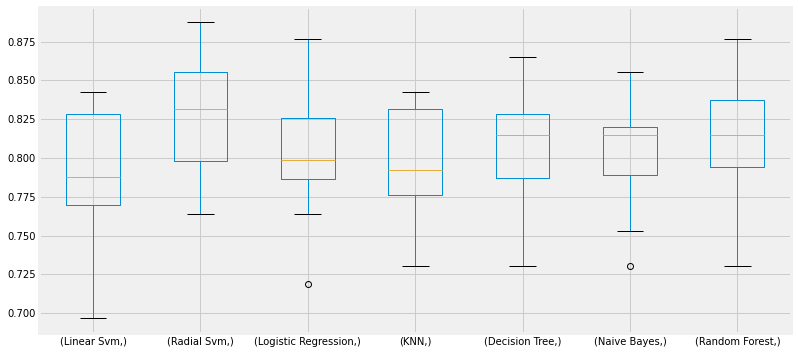

In [66]:
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

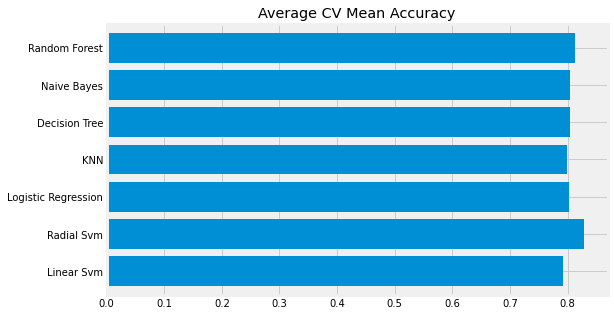

In [69]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf() # 현재 수치를 가져옵니다. 현재 pyplot 그림 스택에 그림이 없으면 를 사용하여 새 그림을 figure()만듭니다
fig.set_size_inches(8,5)
plt.show()

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

- 분류의 정확도를 평가하기 위해 정오분류표를 계산합니다.

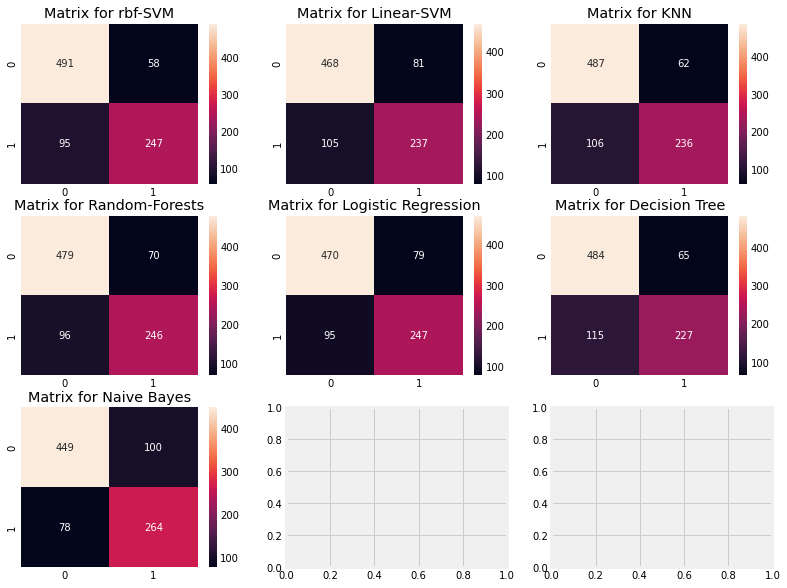

In [70]:
f,ax=plt.subplots(3,3,figsize=(12,10))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)

plt.show()

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

- 

In [71]:
from sklearn.model_selection import GridSearchCV

C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}

gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


In [72]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.8182035026049841
RandomForestClassifier(n_estimators=300, random_state=0)


- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

- 적합하지 않은 추정자를 위한 소프트 투표/다수결 규칙 분류기.

In [73]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
                       
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8208955223880597
The cross validated score is 0.8260424469413234


- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

-  배깅 분류기.

    - 배깅 분류기는 기본 분류기를 각각 원본 데이터 세트의 임의 하위 집합에 맞춘 다음 개별 예측을 집계하여(투표 또는 평균화하여) 최종 예측을 형성하는 앙상블 메타 추정기입니다.

In [74]:
from sklearn.ensemble import BaggingClassifier

model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.832089552238806
The cross validated score for bagged KNN is: 0.8104244694132333


In [75]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8246268656716418
The cross validated score for bagged Decision Tree is: 0.8160174781523096


- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

- AdaBoost 분류기.

    - AdaBoost [1] 분류기는 원래 데이터 세트에 분류기를 맞추는 것으로 시작한 다음 동일한 데이터 세트에 분류기의 추가 복사본을 맞추지만 잘못 분류된 인스턴스의 가중치가 조정되어 후속 분류기가 더 집중하도록 하는 메타 추정기입니다. 

In [76]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

- 분류를 위한 그라디언트 부스팅.

    - 이 알고리즘은 전진 단계 방식으로 가산 모델을 구축합니다. 임의의 미분 가능한 손실 함수의 최적화를 허용합니다. 각 단계에서 n_classes_회귀 트리는 손실 함수의 음의 기울기(예: 이진 또는 다중 클래스 로그 손실)에 적합합니다. 이진 분류는 단일 회귀 트리만 유도되는 특수한 경우입니다

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


- https://xgboost.readthedocs.io/en/stable/

- XGBoost 는 매우 효율적 이고 유연 하며 이식 가능 하도록 설계된 최적화된 분산 그래디언트 부스팅 라이브러리입니다 . Gradient Boosting 프레임워크 에서 기계 학습 알고리즘을 구현합니다 . XGBoost는 빠르고 정확한 방법으로 많은 데이터 과학 문제를 해결하는 병렬 트리 부스팅(GBDT, GBM이라고도 함)을 제공합니다. 동일한 코드가 주요 분산 환경(Hadoop, SGE, MPI)에서 실행되며 수십억 개의 예제를 넘어선 문제를 해결할 수 있습니다.

In [78]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8115480649188515


In [79]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


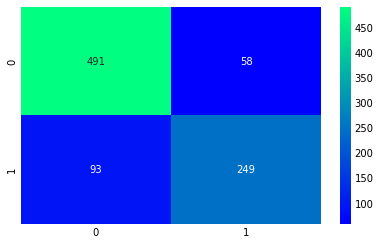

In [80]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

### 기능의 중요도

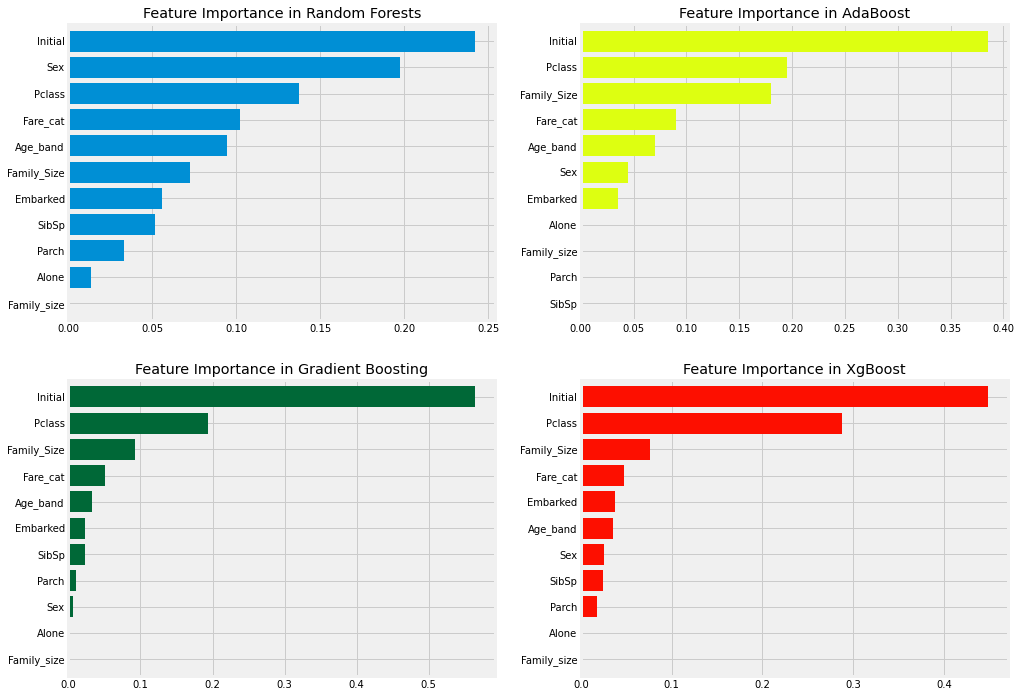

In [81]:
f,ax=plt.subplots(2,2,figsize=(15,12))

# model.feature_importances_,X.columns -> 모델의 중요도
# sort_values 내림차순으로 
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')

model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')

plt.show()